In [57]:
def linearly_decreasing_with_step(x, a, l, r1,  r2, sw_line, Pu):
    y = np.piecewise(
         x,
            [x ==0, x < a, (x >= a) & (x < l), x >= l],
            [0, lambda x: r1 +sw_line*((l/2)-x), lambda x: r1 - Pu +sw_line*((l/2)-x), 0]
    )
    return y 



In [67]:
import numpy as np
import plotly.graph_objects as go
from shapely import (Point, LineString, Polygon, LinearRing, MultiPoint, MultiLineString, MultiPolygon, GeometryCollection)

In [68]:
l = 20

In [69]:
x = np.linspace(0,l)
a = 5 
sw_line = .5 #lb/ft
r1 = 36
r2 = 36
Pu =68
h= 40 
b = 40

In [70]:

y = linearly_decreasing_with_step(x, a, l, r1,  r2, sw_line, Pu)

In [71]:
shear_fig_db = go.Figure(data=go.Scatter(x=x, y=y, mode = "lines", line = dict(color='red')))

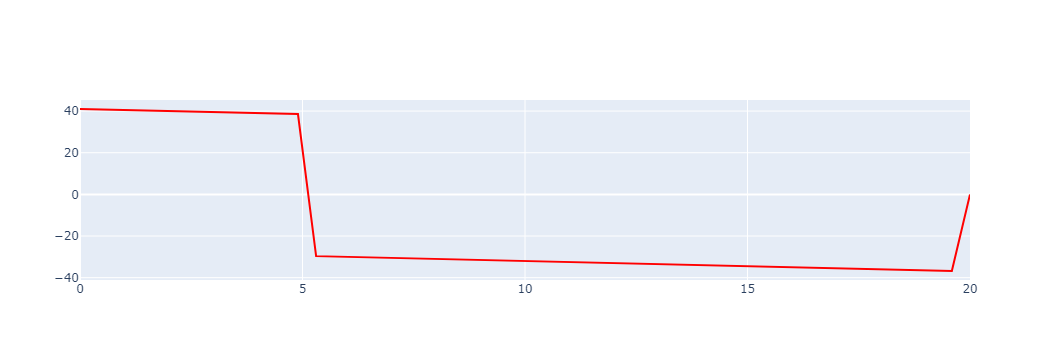

In [72]:
shear_fig_db.show()

In [73]:
P_DL = 20
P_LL = 30 
Pu_bb = max([1.2*P_DL+1.6*P_LL,1.4*P_DL])

In [74]:
Pu_bb

72.0

In [81]:
def linearly_decreasing_with_step(x, a, l, r1,  r2, sw_line, Pu):
    y = np.piecewise(
         x,
            [x ==0, x < a, (x >= a) & (x < l), x >= l],
            [0, lambda x: r1 +sw_line*((l/2)-x), lambda x: r1 - Pu +sw_line*((l/2)-x), 0]
    )
    return y 



def beam_load_analysis(P_DL:float, P_LL:float, l:float, a:float, h:float, b:float, col1=24.0, col2=24.0): 
    """
    Returns dictionary of Pu, shear and moment diagram figures for both bernoulli and deep beams
    Shear Diagram will differ between deep beam and bernoulli beam, in the case of a deep beam
    the self weight contribution is added to the concentrated force. In the case of the bernoulli
    beam, the self weight will be treated as a typical line load. 

    """

    # Calculate Contribution of Beam Self Weight and add to point load
    sw = 150*(h/12)*(b/12)*(l+col1/24 + col2/24)/1000  # Calculates self weight of beam

    P_DL_total = P_DL + sw # Adds self weight to dead load reaction 

    # Determine Max Factored Point Load on Beam
    Pu = max([1.2*P_DL_total+1.6*P_LL,1.4*P_DL_total])
    Pu_bb = max([1.2*P_DL+1.6*P_LL,1.4*P_DL])

    #____________________________Load Analysis for Deep Beam ______________________________#

    b1 = l-a
    #____________________________Load Analysis for Bernoulli Beam ______________________________#



    # Calculate Contribution of Beam Self Weight and add to point load
    sw_line = 150*(h/12)*(b/12)/1000 # Beam Self Weight Line Load 

    # Determine Reactions on Deep Beam 

    r1_bb = (Pu_bb*b1)/l  + (sw_line*l/2)
    r2_bb = (Pu_bb*a)/l  + (sw_line*l/2)

    x_diagram = np.linspace(0, l)
    y_bb = linearly_decreasing_with_step(x_diagram, a, l, r1_bb,  r2_bb, sw_line, Pu_bb)

    print(f"P_DL = {P_DL}")
    print(f"P_LL = {P_LL}")
    print (f"sw_line = {sw_line}")
    print(f"Pu_bb = {Pu_bb}")
    print(f"r1_bb = {r1}")

    return Pu_bb


In [82]:
beam_load_analysis(P_DL, P_LL, l, a, h, b, col1=24.0, col2=24.0)

P_DL = 20
P_LL = 30
sw_line = 1.6666666666666667
Pu_bb = 72.0
r1_bb = 36


72.0